## k-means

Pour tenter de résoudre notre problématique de cluestering nous pouvons utiliser l'algorithme de cluestering k-means.
Il permet d’analyser un jeu de données caractérisées par un ensemble de descripteurs, afin de regrouper les données “similaires” en groupes (ou clusters). Il minimise la somme des variances intra-cluster.

In [29]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [30]:
df = pd.read_csv('./RFM_dataset.csv')
df

,customer_unique_id,Recency,Frequency,Monetary
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373
...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544


In [31]:
df_sample = df.sample(10000, replace=False)
df_sample.shape

(10000, 4)

In [32]:
X = df_sample.drop('customer_unique_id', axis=1).values
y = df_sample['customer_unique_id'].values
print(X.shape)
print(y.shape)

(10000, 3)
(10000,)


In [33]:
from sklearn import preprocessing

X_norm = preprocessing.scale(X)
print(X_norm.shape)

(10000, 3)


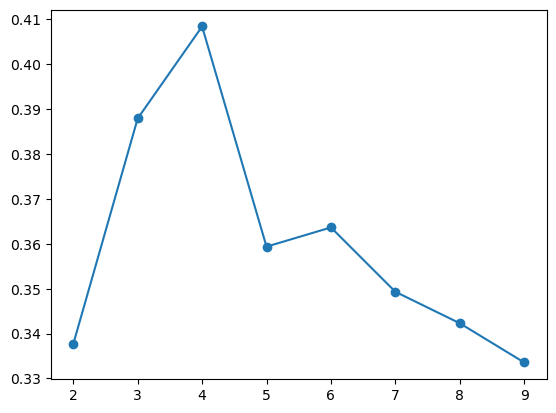

In [34]:
from sklearn import cluster, metrics

silhouettes = []
for num_clusters in range (2, 10): #on regarde de 2 à 10 clusters
    cls = cluster.KMeans(n_clusters=num_clusters, n_init=1, init='random')
    cls.fit(X_norm)
    silh = metrics.silhouette_score(X_norm, cls.labels_)
    silhouettes.append(silh)

plt.plot(range(2, 10), silhouettes, marker='o')

In [35]:
from sklearn import decomposition

X = df.drop('customer_unique_id', axis=1).values
X_norm = preprocessing.scale(X)

pca = decomposition.PCA(n_components=2)
pca.fit(X_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(X_norm)

[0.34432841 0.68471856]


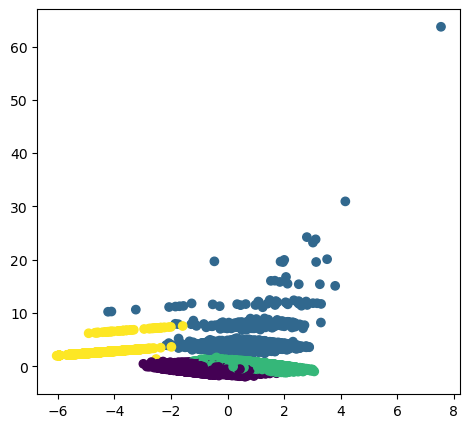

In [36]:
fig = plt.figure(figsize=(12, 5))

cls = cluster.KMeans(n_clusters=4)
cls.fit(X_norm)
ax = fig.add_subplot(121)#1 figure en ordonné, 2 figures en abscisse et on s'occupe de la première figure
ax.scatter(X_trans[:, 0], X_trans[:, 1], c=cls.labels_)#on observe la première et la deuxième composante

Pour déterminer le nombre optimal de cluster à utiliser pour notre algorithme k-means nous utilisons la méthode du coude (Elbow Method), Elle consiste à observer la variation de l'inertie (somme des carrés des distances entre les points et les centroïdes) en fonction du nombre de clusters.

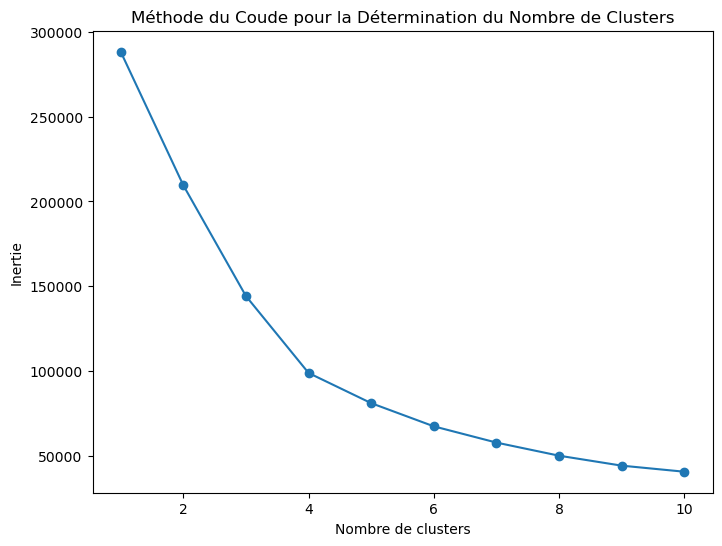

In [37]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_Y = df.drop('customer_unique_id', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_Y)

inertis = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    inertis.append(kmeans.inertia_)

# Tracé de la courbe de l'inertie
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertis, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Inertie')
plt.title('Méthode du Coude pour la Détermination du Nombre de Clusters')
plt.show()

In [38]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(scaled_features)
df['Cluster'] = kmeans.labels_
df

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348,1
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216,2
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432,2
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031,0
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373,2
...,...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089,0
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569,2
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809,0
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544,0


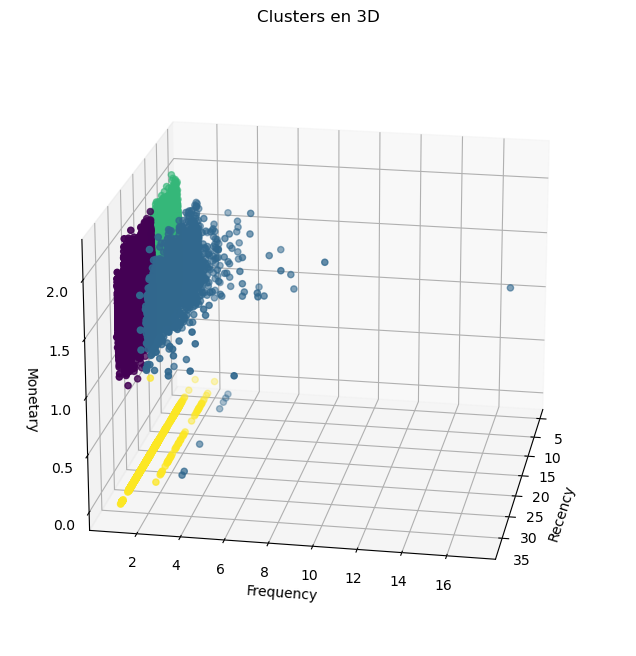

In [39]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
#ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')

scatter = ax.scatter(df['Recency'], df['Frequency'], df['Monetary'], c=df['Cluster'], cmap='viridis')

fig.colorbar(scatter, ax=ax, label='Clusters')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

ax.view_init(azim=10, elev=20)

plt.title('Clusters en 3D')
plt.show()

Nous pouvons également utiliser le coefficient de distortion pour obtenir le k le plus adapté à notre modèle. Connu sous le nom d'inertie intra-classe, c'est une mesure qui évalue la compacité des clusters obtenus lors de l'application d'un algorithme de clustering comme K-means. Il mesure la somme des carrés des distances euclidiennes entre chaque point de données et le centroïde de son cluster associé.

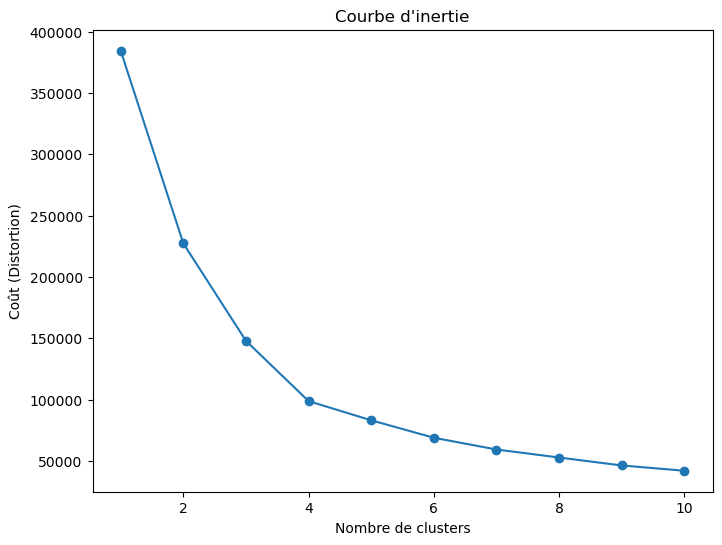

In [40]:
df_X = df.drop('customer_unique_id', axis=1)

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_X)

distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(scaled_features)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('Coût (Distortion)')
plt.title("Courbe d'inertie")
plt.show()

In [41]:
df_cluster = df.copy()
#df_cluster.drop(columns={'Recency', 'Frequency', 'Monetary'}, inplace=True)
df_cluster

,customer_unique_id,Recency,Frequency,Monetary,Cluster
0,7c396fd4830fd04220f754e42b4e5bff,27.289810,2,1.303348,1
1,af07308b275d755c9edb36a90c618231,14.162002,1,1.601216,2
2,3a653a41f6f9fc3d2a113cf8398680e8,13.051752,1,1.647432,2
3,7c142cf63193a1473d2e66489a9ae977,25.737451,1,1.457031,0
4,72632f0f9dd73dfee390c9b22eb56dd6,22.505471,1,1.220373,2
...,...,...,...,...,...
96091,6359f309b166b0196dbf7ad2ac62bb5a,33.093157,1,1.494089,0
96092,da62f9e57a76d978d02ab5362c509660,22.786720,1,1.663569,2
96093,737520a9aad80b3fbbdad19b66b37b30,28.407875,1,1.723809,0
96094,5097a5312c8b157bb7be58ae360ef43c,23.908753,1,1.686544,0


In [42]:
cluster_dataset = 'clustert_dataset.csv'
df_cluster.to_csv(cluster_dataset, index=False)